In [ ]:
import os
os.chdir("/content/drive/MyDrive/Udemy Project")
os.getcwd()

'/content/drive/MyDrive/Udemy Project'

In [ ]:
ls

'compresive_strength_concrete+2 (1).csv'   Section_6_Com_str.ipynb
 Concrete.png                              Section_7_Credit_Card.ipynb
 creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_credit = pd.read_csv('creditcard.csv')

In [ ]:
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df_credit.shape

(284807, 31)

In [ ]:
round((df_credit['Class'].value_counts() * 100)/ len(df_credit['Class']),2)

0    99.83
1     0.17
Name: Class, dtype: float64

## EDA

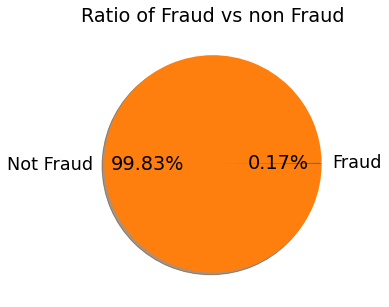

In [ ]:
Fraud = len(df_credit[df_credit['Class'] == 1])
Not_Fraud = len(df_credit[df_credit['Class'] == 0])
size = [Fraud,Not_Fraud]
# Plot the pie chart

plt.figure(figsize=(5,5))
plt.pie(size,labels=['Fraud','Not Fraud'],shadow=True,startangle=0,autopct='%1.2f%%')
plt.title('Ratio of Fraud vs non Fraud')
sns.set_context('paper',font_scale=2)
plt.show()

Preparing the data for model building

In [ ]:
x = df_credit.drop('Class',axis=1)
y = df_credit['Class']
x.shape,y.shape

((284807, 30), (284807,))

In [ ]:
# train and test spilt
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [ ]:
# Usimg Dummy classifier to verify the imbalace dataset
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
dummy = DummyClassifier(strategy='most_frequent',random_state=1)
dummy.fit(xtrain,ytrain)
y_pred_dummy = dummy.predict(xtest)

# checking the unique values
print('Unique Predicted Values:', np.unique(y_pred_dummy))
print('Accuracy Score:', accuracy_score(ytest,y_pred_dummy))
print('Confusion Matrix Score:','\n', confusion_matrix(ytest,y_pred_dummy))
print('Confusion Matrix Score:','\n' ,classification_report(ytest,y_pred_dummy))


Unique Predicted Values: [0]
Accuracy Score: 0.9984199992977775
Confusion Matrix Score: 
 [[85308     0]
 [  135     0]]
Confusion Matrix Score: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.00      0.00      0.00       135

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Up Sampling

In [ ]:
from sklearn.utils import resample
df_train = pd.concat([xtrain,ytrain],axis=1)
not_fruad = df_train[df_train.Class == 0]
fruad = df_train[df_train.Class == 1]

## upsamples
fraud_upsampled = resample(fruad,replace=True,n_samples=len(not_fruad),random_state=1 )
upsampled_data = pd.concat([not_fruad,fraud_upsampled])

upsampled_data.Class.value_counts()

1    199007
0    199007
Name: Class, dtype: int64

In [ ]:
upsampled_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Creating the logistics model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xtrain_upsampled = upsampled_data.drop('Class',axis=1) 
ytrain_upsampled = upsampled_data.Class

print(xtrain_upsampled.shape,ytrain_upsampled.shape)

log_model_upsampled = LogisticRegression(solver='liblinear')
log_model_upsampled.fit(xtrain_upsampled,ytrain_upsampled)

y_pred_upsampled = log_model_upsampled.predict(xtest)

print('Accuracy Score','\n',accuracy_score(ytest,y_pred_upsampled))
print('*********' * 10)

print('Confusion Matrix','\n',pd.DataFrame(confusion_matrix(ytest,y_pred_upsampled)))
print('*********' * 10)
print('classification_report ','\n',classification_report(ytest,y_pred_upsampled))
#


(398014, 30) (398014,)
Accuracy Score 
 0.9757967299837318
******************************************************************************************
Confusion Matrix 
        0     1
0  83259  2049
1     19   116
******************************************************************************************
classification_report  
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85308
           1       0.05      0.86      0.10       135

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.54     85443
weighted avg       1.00      0.98      0.99     85443



# Downsampling

In [ ]:
#not_fruad = df_train[df_train.Class == 0]
#fruad = df_train[df_train.Class == 1]

## downsampling of the data
fraud_down = resample(not_fruad,replace=True,n_samples=len(fruad),random_state=1 )
down_data = pd.concat([fruad,fraud_down])

down_data.Class.value_counts()

1    357
0    357
Name: Class, dtype: int64

In [ ]:
# Creating the logistics model
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xtrain_down = down_data.drop('Class',axis=1) 
ytrain_down = down_data.Class

print(xtrain_down.shape,ytrain_down.shape)

log_model_down = LogisticRegression(solver='liblinear')
log_model_down.fit(xtrain_down,ytrain_down)

y_pred_down = log_model_down.predict(xtest)

print('Accuracy Score','\n',accuracy_score(ytest,y_pred_down))
print('*********' * 10)

print('Confusion Matrix','\n',pd.DataFrame(confusion_matrix(ytest,y_pred_down)))
print('*********' * 10)
print('classification_report ','\n',classification_report(ytest,y_pred_down))
#


(714, 30) (714,)
Accuracy Score 
 0.9735379141649989
******************************************************************************************
Confusion Matrix 
        0     1
0  83063  2245
1     16   119
******************************************************************************************
classification_report  
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85308
           1       0.05      0.88      0.10       135

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.54     85443
weighted avg       1.00      0.97      0.99     85443



# Smote - symtatic minority oversampling technique

In [ ]:
from imblearn.over_sampling import SMOTE

## AUC ROC Curve

<function matplotlib.pyplot.show>

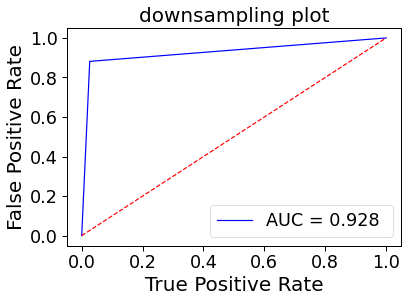

In [ ]:
from sklearn.metrics import roc_curve,auc

fprdw,tprdw,thresholddw = roc_curve(ytest,y_pred_down)
roc_auc_dw = auc(fprdw,tprdw)

# plotting the Roc and AUc curve
plt.plot(fprdw,tprdw,'b',label = 'AUC = %0.3f ' % roc_auc_dw)
plt.plot([0,1],[0,1],'r--')
plt.title('downsampling plot',fontsize=20)
plt.xlabel('True Positive Rate', fontsize=20)
plt.ylabel('False Positive Rate', fontsize=20)
plt.legend(loc ='lower right')
plt.show

<function matplotlib.pyplot.show>

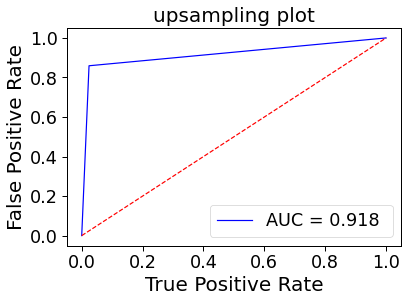

In [ ]:
#from sklearn.metrics import roc_curve,auc

fprup,tprup,thresholdup = roc_curve(ytest,y_pred_upsampled)
roc_auc_up = auc(fprup,tprup)

# plotting the Roc and AUc curve
plt.plot(fprup,tprup,'b',label = 'AUC = %0.3f ' % roc_auc_up)
plt.plot([0,1],[0,1],'r--')
plt.title('upsampling plot',fontsize=20)
plt.xlabel('True Positive Rate', fontsize=20)
plt.ylabel('False Positive Rate', fontsize=20)
plt.legend(loc ='lower right')
plt.show

In [ ]:
roc_auc_dw

0.9275825375241609

In [ ]:
df_credit.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df_credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000
